In [1]:
import pandas as pd
import json
import sys
import os
import gensim
import numpy as np
import glob
from sklearn.cluster import KMeans
from gensim.models.doc2vec import Doc2Vec

C:\Users\Big data\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df_all = pd.DataFrame(columns=[ 'content', 'date_', 'infor', 'source', 'tag','title', 'type', ])
for files in glob.glob('E:/news_project/news_beforeETL/printed_news/printed_news_1040'):
    with open(files,"r", encoding="utf-8") as json_data:
        data = json.load(json_data)
        df = pd.DataFrame.from_dict(data, orient='columns')
        df_all=pd.concat([df_all,df],axis=0,ignore_index=True )
print(df_all.head())

                                             content                 date_  \
0  前總統馬英九（右）30日在立法院出席「青島東很多派對」第3屆國會青年體驗營講座，進場時向一旁...           2018-06-30    
1  國民黨台北市長參選人丁守中（前右）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，...           2018-06-30    
2  國民黨台北市長參選人丁守中（左）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，爭...           2018-06-30    
3  （中央社記者蕭博陽南投縣30日電）總統蔡英文今天視察草屯植物公園，總統肯定草屯鎮長洪國浩施政...  2018-06-30 13:09:41    
4  （中央社記者王淑芬高雄30日電）總統府秘書長陳菊今天南下出席高雄市旗山區圖書分館落成。她說，...  2018-06-30 12:45:41    

                                             infor source  tag  \
0                            2018-06-30 /中央社 /國內政治   中央社   NaN   
1                            2018-06-30 /中央社 /國內政治   中央社   NaN   
2                            2018-06-30 /中央社 /國內政治   中央社   NaN   
3  2018-06-30 13:09:41 /中央社 /國內政治 /中央社記者蕭博陽南投縣30日電   中央社   NaN   
4   2018-06-30 12:45:41 /中央社 /國內政治 /中央社記者王淑芬高雄30日電   中央社   NaN   

                title     type  
0   馬英九出席國會青年體驗營（1）\n  printed  
1      丁守中與吳伯雄同台（2）\n  printed  
2      丁守中與吳伯雄同台（1）\n  printed  
3 

C:\Users\Big data\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
df=df_all
#df = df.drop(["author"], axis=1)
df = df.drop(["date_"], axis=1)
df = df.drop(["infor"], axis=1)
df = df.drop(["tag"], axis=1)
df = df.drop(["source"], axis=1)
df = df.drop(["type"], axis=1)
#df = df.drop(["url"], axis=1)
print(df.head())

                                             content               title
0  前總統馬英九（右）30日在立法院出席「青島東很多派對」第3屆國會青年體驗營講座，進場時向一旁...   馬英九出席國會青年體驗營（1）\n
1  國民黨台北市長參選人丁守中（前右）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，...      丁守中與吳伯雄同台（2）\n
2  國民黨台北市長參選人丁守中（左）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，爭...      丁守中與吳伯雄同台（1）\n
3  （中央社記者蕭博陽南投縣30日電）總統蔡英文今天視察草屯植物公園，總統肯定草屯鎮長洪國浩施政...  墓仔埔變公園 總統肯定洪國浩施政\n
4  （中央社記者王淑芬高雄30日電）總統府秘書長陳菊今天南下出席高雄市旗山區圖書分館落成。她說，...  陳菊：為陳其邁輔選是應該也是責任\n


In [4]:
print(df.head())

                                             content               title
0  前總統馬英九（右）30日在立法院出席「青島東很多派對」第3屆國會青年體驗營講座，進場時向一旁...   馬英九出席國會青年體驗營（1）\n
1  國民黨台北市長參選人丁守中（前右）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，...      丁守中與吳伯雄同台（2）\n
2  國民黨台北市長參選人丁守中（左）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，爭...      丁守中與吳伯雄同台（1）\n
3  （中央社記者蕭博陽南投縣30日電）總統蔡英文今天視察草屯植物公園，總統肯定草屯鎮長洪國浩施政...  墓仔埔變公園 總統肯定洪國浩施政\n
4  （中央社記者王淑芬高雄30日電）總統府秘書長陳菊今天南下出席高雄市旗山區圖書分館落成。她說，...  陳菊：為陳其邁輔選是應該也是責任\n


In [5]:
def split_news(news):
    return " ".join(jieba.cut(news))

def process_news(df):
    df['content'] = df ['content'].apply(split_news)
    df['title'] = df['title'].str.replace('\r','')
    df['title'] = df['title'].str.replace('\n','')
    return df

In [6]:
import jieba
df = process_news(df)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BIGDAT~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.743 seconds.
Prefix dict has been built succesfully.


In [7]:
df.head()

,content,title
0,前 總統 馬 英九 （ 右 ） 30 日 在 立法院 出席 「 青島東 很多 派 對 」 第...,馬英九出席國會青年體驗營（1）
1,國民黨 台北市 長 參選人 丁守中 （ 前右 ） 30 日 在 台北 出席 「 中華海峽 兩...,丁守中與吳伯雄同台（2）
2,國民黨 台北市 長 參選人 丁守中 （ 左 ） 30 日 在 台北 出席 「 中華海峽 兩岸...,丁守中與吳伯雄同台（1）
3,（ 中央社 記者 蕭博陽 南投 縣 30 日電 ） 總統 蔡 英文 今天 視察 草屯 植物 ...,墓仔埔變公園 總統肯定洪國浩施政
4,（ 中央社 記者 王淑芬 高雄 30 日電 ） 總統府 秘書長 陳 菊 今天 南下 出席 高...,陳菊：為陳其邁輔選是應該也是責任


In [8]:
#取出content列為一個list
b=list(df['content'])

In [9]:
### 取所有'content'欄位的值
# df.loc[:,['content']]

### 取第0個值_行，在第0個欄位('content')_欄
# t=df.iloc[0,0]
# print(type(t))

### 文檔放到list中
# data = []
# for d in range(0,300):
#     t=df.iloc[d,0]
#     data.append(t)

In [10]:
TaggededDocument=gensim.models.doc2vec.TaggedDocument

In [11]:
x_train=[]
for i, text in enumerate(b):
    word_list = text.split(' ')
    l = len(word_list)
    word_list[l-1]=word_list[l-1].strip()
    document=TaggededDocument(word_list,tags=[i])
    x_train.append(document)
#print(x_train)
c = x_train

*sentences：可以是一个list，对于大语料集，建议使用BrownCorpus,Text8Corpus或lineSentence构建。
*size：是指特征向量的维度，默认为100。
*alpha: 是初始的学习速率，在训练过程中会线性地递减到min_alpha。
*window：窗口大小，表示当前词与预测词在一个句子中的最大距离是多少。
*min_count:可以对字典做截断. 词频少于min_count次数的单词会被丢弃掉, 默认值为5。
*max_vocab_size: 设置词向量构建期间的RAM限制，设置成None则没有限制。
*sample: 高频词汇的随机降采样的配置阈值，默认为1e-3，范围是(0,1e-5)。
*seed：用于随机数发生器。与初始化词向量有关。
*workers：用于控制训练的并行数。
*min_alpha：学习率的最小值。
*sg： 用于设置训练算法，默认为0，对应CBOW算法；sg=1则采用skip-gram算法。
*hs: 如果为1则会采用hierarchica·softmax技巧。如果设置为0（默认），则使用negative sampling。
*negative: 如果>0,则会采用negativesampling，用于设置多少个noise words（一般是5-20）。
*cbow_mean: 如果为0，则采用上下文词向量的和，如果为1（default）则采用均值，只有使用CBOW的时候才起作用。
*hashfxn： hash函数来初始化权重，默认使用python的hash函数。
*iter： 迭代次数，默认为5。
*trim_rule： 用于设置词汇表的整理规则，指定那些单词要留下，哪些要被删除。可以设置为None（min_count会被使用）。
*sorted_vocab： 如果为1（默认），则在分配word index 的时候会先对单词基于频率降序排序。
*batch_words：每一批的传递给线程的单词的数量，默认为10000。

In [12]:
model=Doc2Vec(x_train, min_count=1, window=3, vector_size=300, negative=5,workers=4)
model.train(x_train,total_examples=model.corpus_count,epochs=10)

In [13]:
model_dm=model

In [14]:
#預測新句子的向量Paragraph vector了,這裡用gensim裡infer_vector(),
#預測新的句子，這裡根據經驗，alpha（學習步長）設置小一些，
#迭代次數設置大一些。找到訓練樣本中與這個句子最相近的10個句子。
#可以看到訓練出來的結果與測試的新句子是有關聯的。
strl=df.iloc[10,0]
test_text=strl.split(' ')
#得到向量array命名為inferred_vector
inferred_vector=model_dm.infer_vector(doc_words=test_text,alpha=0.025,steps=500)

sims=model_dm.docvecs.most_similar([inferred_vector],topn=3)
sims

C:\Users\Big data\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(110, 0.5431971549987793),
 (192, 0.5304972529411316),
 (195, 0.518020510673523)]

In [15]:
#找到與特定文章strl相似的文章

for count, sim in sims:
    print(count,sim)
    sentence = c[count]
    words = ''
    
    for word in sentence[0]:
        words = words + word +' '
    print(words,sim,len(sentence[0]))
    

110 0.5431971549987793
【 記者 簡玲穎 台北 報導 】 日本 產經 新聞 報導 專訪 外交部 長 吳釗燮 的 內容 ， 中國 駐 日 使館 向 產經 抗議 ， 指報 導主張 台獨 。 外交部 28 日 說 ， 中國 干預 日本 、 台灣 的 新聞 、 言論 自由 ， 對 這樣 的 作法 ， 「 完全 無法 接受 」 。 產經 早報 27 日 報導 專訪 吳釗燮 的 內容 ， 吳釗燮 表示 ， 日本 和 台灣 同樣 面臨 中國 軍事 與 威脅 ， 呼籲台 日 進行 安全 保障 對話 。 報導 指出 ， 台日 沒有 邦交 ， 高級 官員 要求 雙方 對 話 實屬 罕見 ； 但 中國 在 台灣 周邊 軍事動作 頻頻 ， 吳釗燮 盼台 日進 一步 加強關 係 因應 。 不過 ， 產經 電子 報 昨 27 日 晚間 報導 ， 中國 駐 日 使館 已 向 產經 新聞 提出 抗議 ， 指台灣 是 中國 的 一部 份 ， 報導 主張 台灣 獨立 ， 中國 強烈 反對 。 對此 ， 外交部 發言人 李憲章 28 日 在 外交部 例行 新聞 說 明會 回應 媒體詢 問時 指出 ， 中國 的 做法 嚴重 干 預新聞 獨立 與 自由 。 中國 威權 專制 ， 不但 沒有 容忍 國內 新聞 、 言論 自由 的 空間 ， 還進 一步 干預 日本 、 台灣 的 新聞 、 言論 自由 。 李憲章 說 ， 對 於 中國 這樣 的 作法 ， 「 我們 覺得 完全 沒有 辦法 接受 」 。 這也 顯示 中國 的 作法 已經 嚴重 威脅 自由 、 民主 的 普世價值 理念 ； 外交部 呼籲 理念 相近 國家團 結起 來 ， 共同 阻止 這樣 趨勢 的 蔓延 。 對 於 媒體 問及 中國施 壓國際 航空公司 更改 對 台灣 的 稱呼 矮化 台灣 ， 李憲章 強調 ， 中國大陸 打壓 台灣 無 所 不 在 ， 並擴 及 國際 企業 和 航空公司 ， 外交部 對 遭到 中國施 壓 的 企業 深表同情 。 他 說 ， 中國大陸 打壓 台灣 的 做法 ， 不僅 引起 台灣 人民 憤慨 ， 也 在 國際上 犯眾 怒 ， 公然 違背 國際 貿易 自由 的 原則 跟 精神 。 2018 / 6 / 28 矮化 台灣   日國會 議員 看不下去 【 本報 綜合 報導 】 針對 中國 民航局 強制 要

In [16]:
#跑很久喔!請小心
#所有的文章都得到固定長度的vec
df['d2v_Vec']='0'
for i in range(0,300):
    strl=df.iloc[i,0]
    test_text=strl.split(' ')
    #得到向量array命名為inferred_vector
    inferred_vector=model_dm.infer_vector(doc_words=test_text,alpha=0.025,steps=500)
    
    df.loc[i,'d2v_Vec']=list(inferred_vector)
    
print(df.head())    

                                             content             title  \
0  前 總統 馬 英九 （ 右 ） 30 日 在 立法院 出席 「 青島東 很多 派 對 」 第...   馬英九出席國會青年體驗營（1）   
1  國民黨 台北市 長 參選人 丁守中 （ 前右 ） 30 日 在 台北 出席 「 中華海峽 兩...      丁守中與吳伯雄同台（2）   
2  國民黨 台北市 長 參選人 丁守中 （ 左 ） 30 日 在 台北 出席 「 中華海峽 兩岸...      丁守中與吳伯雄同台（1）   
3  （ 中央社 記者 蕭博陽 南投 縣 30 日電 ） 總統 蔡 英文 今天 視察 草屯 植物 ...  墓仔埔變公園 總統肯定洪國浩施政   
4  （ 中央社 記者 王淑芬 高雄 30 日電 ） 總統府 秘書長 陳 菊 今天 南下 出席 高...  陳菊：為陳其邁輔選是應該也是責任   

                                             d2v_Vec  
0  [0.23528457, -1.2880014, -0.53503346, -1.02029...  
1  [-0.056727484, -0.8294517, -0.5735456, -1.0049...  
2  [-0.017541343, -0.6924254, -0.45178822, -0.795...  
3  [1.2334144, -0.10023116, -3.6274984, -1.173198...  
4  [-1.1006318, 0.49320358, -0.094546005, 0.11488...  


In [18]:
#轉成list，kmean才可以讀
infered_vectors_list=list(df['d2v_Vec'])


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
scores=[]
ks=[]

for i in range(2, 11):
    clu = KMeans(n_clusters= i)
    clu.fit(infered_vectors_list)
    clu_score = silhouette_score(infered_vectors_list, clu.labels_)
    scores.append(clu_score)
    ks.append(i)

分數 : [0.1716053, 0.13431266, 0.09306431, 0.10342569, 0.14213666, 0.12639947, 0.12940107, 0.109221265, 0.12772143]
K值 : [2, 3, 4, 5, 6, 7, 8, 9, 10]


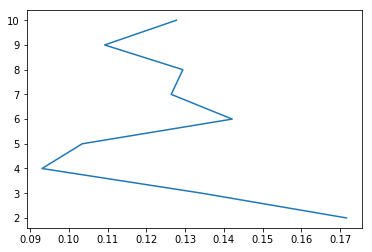

In [20]:
print("分數 :", scores)
print("K值 :", ks)
plt.plot(scores, ks)

In [21]:
from sklearn.cluster import KMeans
clu=(KMeans(n_clusters= 6))
clu.fit(infered_vectors_list)
clu.labels_

array([3, 3, 3, 2, 3, 3, 4, 3, 3, 0, 4, 2, 0, 0, 3, 0, 0, 4, 2, 1, 5, 0,
       4, 4, 0, 3, 4, 3, 4, 4, 4, 0, 4, 3, 3, 2, 2, 0, 2, 3, 2, 3, 3, 3,
       3, 3, 3, 0, 5, 3, 0, 0, 0, 3, 0, 1, 4, 4, 3, 3, 3, 2, 0, 4, 3, 3,
       0, 4, 4, 5, 3, 4, 0, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 4, 4, 4, 2, 0,
       0, 2, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 4, 4, 2,
       4, 5, 5, 3, 0, 3, 4, 3, 2, 4, 0, 0, 3, 2, 2, 3, 3, 3, 2, 4, 0, 0,
       0, 3, 0, 4, 4, 0, 2, 0, 0, 3, 0, 0, 0, 2, 3, 5, 3, 0, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 2, 3, 4, 4, 4, 4, 4, 4, 4, 2, 3, 0, 3, 4, 4, 4, 3,
       4, 3, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 5, 4, 3, 3,
       4, 3, 3, 3, 3, 0, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 5,
       3, 3, 2, 0, 3, 3, 3, 5, 1, 0, 3, 3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 2, 4, 0, 3, 4, 3, 0, 0, 3, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 3, 3, 3, 2, 3, 3, 4, 0, 2, 4, 3, 5, 3, 3, 3,
       3, 0, 0, 4, 3, 2, 2, 2, 4, 0, 3, 3, 3, 3])

In [22]:
df['group']='0'
# df
for idx in range(0,300):
    df.loc[idx, 'group'] = clu.labels_[idx]


In [23]:
df.head()

,content,title,d2v_Vec,group
0,前 總統 馬 英九 （ 右 ） 30 日 在 立法院 出席 「 青島東 很多 派 對 」 第...,馬英九出席國會青年體驗營（1）,"[0.23528457, -1.2880014, -0.53503346, -1.02029...",3
1,國民黨 台北市 長 參選人 丁守中 （ 前右 ） 30 日 在 台北 出席 「 中華海峽 兩...,丁守中與吳伯雄同台（2）,"[-0.056727484, -0.8294517, -0.5735456, -1.0049...",3
2,國民黨 台北市 長 參選人 丁守中 （ 左 ） 30 日 在 台北 出席 「 中華海峽 兩岸...,丁守中與吳伯雄同台（1）,"[-0.017541343, -0.6924254, -0.45178822, -0.795...",3
3,（ 中央社 記者 蕭博陽 南投 縣 30 日電 ） 總統 蔡 英文 今天 視察 草屯 植物 ...,墓仔埔變公園 總統肯定洪國浩施政,"[1.2334144, -0.10023116, -3.6274984, -1.173198...",2
4,（ 中央社 記者 王淑芬 高雄 30 日電 ） 總統府 秘書長 陳 菊 今天 南下 出席 高...,陳菊：為陳其邁輔選是應該也是責任,"[-1.1006318, 0.49320358, -0.094546005, 0.11488...",3


In [24]:
### 取第0個值_行，在第0個欄位('content')_欄
print(df.iloc[[110,192,195,57,6],[0,3]])

                                               content group
110  【 記者 簡玲穎 台北 報導 】 日本 產經 新聞 報導 專訪 外交部 長 吳釗燮 的 內容...     4
192  （ 中央社 華盛頓 29 日 綜合 外電 報導 ） 兩名 美國 官員 告訴 美國 有線 電視...     4
195  （ 中央社 華盛頓 29 日 綜合 外電 報導 ） 兩名 美國 官員 告訴 美國 有線 電視...     4
57   兩名 美國 官員 告訴 美國 有線 電視 新聞網 （ Ｃ Ｎ Ｎ ） ， 美國 國務院 已 ...     4
6    （ 中央社 記者 游凱翔 台北 30 日電 ） CNN 報導 ， 美國 國務院 已 要求 派...     4


In [39]:
df[df['group'] == 6]

,content,title,d2v_Vec,group
